In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Hyper-parameters
input_size = 1
output_size = 1
num_epochs = 60
learning_rate = 0.001


In [3]:
# Toy dataset
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

In [4]:
# Linear regression model
model = nn.Linear(input_size, output_size)


In [5]:
# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [6]:
# Train the model
for epoch in range(num_epochs):
    # Convert numpy arrays to torch tensors
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    
    # Backward and optimize
    optimizer.zero_grad()
    '''
    Since the backward() function accumulates gradients, and you don’t want to mix up gradients 
    between minibatches, you have to zero them out at the start of a new minibatch. This is exactly 
    like how a general (additive) accumulator variable is initialized to 0 in code.

    By the way, the best practice is to use the zero_grad() 3.2k function on the optimizer.
    '''
    loss.backward() # this calculates gradient, now to store these gradients we need to 
    #clear previous mini batch gradient
    optimizer.step() # optimizer updating the weights
    
    if (epoch+1) % 5 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

Epoch [5/60], Loss: 42.7697
Epoch [10/60], Loss: 17.5696
Epoch [15/60], Loss: 7.3603
Epoch [20/60], Loss: 3.2239
Epoch [25/60], Loss: 1.5479
Epoch [30/60], Loss: 0.8685
Epoch [35/60], Loss: 0.5929
Epoch [40/60], Loss: 0.4809
Epoch [45/60], Loss: 0.4352
Epoch [50/60], Loss: 0.4163
Epoch [55/60], Loss: 0.4083
Epoch [60/60], Loss: 0.4047


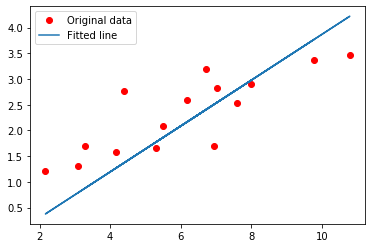

In [7]:
# Plot the graph
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [ ]:
# Save the model checkpoint
torch.save(model.state_dict(), 'model.ckpt')